In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(torch.manual_seed(1))    # reproducible这个参数是做什么的
print(torch.rand(2))#这里的参数是产生随机数的数量

tensor([0.7576, 0.2793])


tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

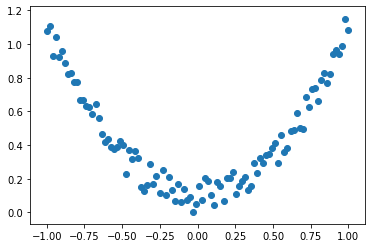

In [3]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)#-1到范围内产生100个数
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)
print(x)
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [19]:

def relu(x):
    if(x.data>0):
        return x
    else:
        return 0

def Net(x,W1,W2,b1,b2):
    hidden = torch.mm(x, W1) + b1  # 100*10+10，每行都加b1
    hidden = F.relu(hidden)
    prediction = torch.mm(hidden, W2) + b2
    return prediction,hidden


def Loss(prediction, y):
    return torch.sqrt(torch.mul(prediction - y, prediction - y).sum(0)) / len(x) / 2


def SGD(prediction, y,hidden,LR,W1,W2,b1,b2):
    d = -(prediction - y) / len(x)
    dW2 = torch.sum(d * hidden,dim=0)
    #     print(d*hidden)
    db2 = torch.sum(d,dim=0)
    mul = d * torch.transpose(W2, 1, 0)
    dW1 = torch.sum(x * mul,dim=0)
    db1 = torch.sum(mul,dim=0)
    W1=W1+dW1*LR
    W2=W2+dW2*LR
    b1=b1+db1*LR
    b2=b2+db2*LR
    
    
if __name__=='__main__':
    n_feature=1
    n_hidden=10
    n_output=1
    LR=0.1
    W1=torch.rand(n_feature,n_hidden)
    b1=torch.rand(n_hidden)
    W2=torch.rand(n_hidden,n_output)
    b2=torch.rand(n_output)
    prediction,hidden = Net(x,W1,W2,b1,b2)
    loss = Loss(prediction, y)
    SGD(prediction, y,hidden,LR,W1,W2,b1,b2)

In [ ]:
print(x.size(),W1.size())
print(x)
print(W1)
print(torch.mul(x,W1))